* This is a python jupyter notebook on the persisten homology with a python-binding package, dionysus. (incomplete version at this stage)
    + About dionysus : https://github.com/mrzv/dionysus
    + Version : 0.0
    + Last update : May 5, 2018

* This is based on the tutorials in http://mrzv.org/software/dionysus2/

I'm planning to write down some documenations on the persistent cohomology for beginners...<br>
(either in Japanese or in English, which I've not decieded yet)

* You need the Boost C++ library
    + If you use Ubuntu, only you need to do is
        > sudo apt-get install libboost-all-dev
* If you get an error message like "version `GLIBCXX_3.4.20' not found", you should update libgcc package
    > conda update libgcc
* If you still  have troubles, you may ask Google teacher.

# 1. Beginning

### Let's try : import dionysus

In [2]:
import dionysus
dionysus.__version__

'2.0.5'

### auxiliary functions to see the properties of objects

In [83]:
def dir_(x):
    return [ s for s in dir(x) if s[0] != '_']
def dir__(x):
    return [ (s, 'method') if callable(getattr(x, s)) else (s, 'non-method') for s in dir_(x) ]
def info(x, show_value=True):
    print(type(x))
    print(dir__(x))
    if show_value:
        print(x)

## - Simplex

### define a simplex
* any data point is labeled by a integer
    + Hereafter we call it label of the vertex

In [4]:
from dionysus import Simplex

In [110]:
# Let's define a 3-simplex from 4-points (0,1,2,3)
n = 3
s = Simplex(range(n+1))
info(s, show_value=False)

<class 'dionysus._dionysus.Simplex'>
[('boundary', 'method'), ('data', 'non-method'), ('dimension', 'method'), ('join', 'method')]


In [73]:
# We can associate a real value to the simplex, later, which we can interpret as the radius at which it appears in the nerve
print(s.data)
s.data = 3.
print(s.data)

4.0
3.0


In [99]:
# Remark : we can also define the degenerate simplices
Simplex([0,1,2,1,2], 100.)

<0,1,1,2,2> 100

### get the label of the vertices ( data points ) of the simplex

In [87]:
for v in s:
    print(v)
print(type(v))

0
1
2
3
<class 'int'>


### get the boudary facet of the simplex

In [90]:
print("dim. = ", s.dimension())
for i, v in enumerate(s.boundary()):
    print("No. {0} : {1}".format(i, v))# i-th (n-1)-simplex, its value associated to the i-th boudary face
print('---')
info(v)

dim. =  3
No. 0 : <1,2,3> 0
No. 1 : <0,2,3> 0
No. 2 : <0,1,3> 0
No. 3 : <0,1,2> 0
---
<class 'dionysus._dionysus.Simplex'>
[('boundary', 'method'), ('data', 'non-method'), ('dimension', 'method'), ('join', 'method')]
<0,1,2> 0


### generate all faces whose dimensions are lower than a  given value

In [55]:
from dionysus import closure

In [93]:
closure([s], 1)# all the 1-faces and 0-faces

[<0,2> 0,
 <0,1> 0,
 <1,3> 0,
 <0,3> 0,
 <1,2> 0,
 <2,3> 0,
 <0> 0,
 <1> 0,
 <2> 0,
 <3> 0]

In [92]:
closure([s], 2)# all the 2-faces, the 1-faces and 0-faces

[<0,2,3> 0,
 <0,1,3> 0,
 <0,2> 0,
 <0,1> 0,
 <1,3> 0,
 <0,3> 0,
 <1,2> 0,
 <2,3> 0,
 <1,2,3> 0,
 <0> 0,
 <1> 0,
 <2> 0,
 <3> 0,
 <0,1,2> 0]

## - Filtration ::: under construction

In [100]:
from dionysus import Filtration

## - Vietoris-Rips complexes

### generate data points and plot them

In [215]:
import numpy as np

num_data_points = 20
dim_feature_space = 2

np.random.seed(10)
X = np.random.rand(num_data_points, dim_feature_space)

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

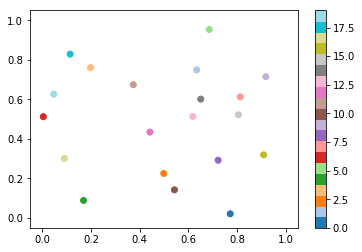

In [216]:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.scatter(X[:,0], X[:,1], c=np.arange(len(X)), cmap=cm.tab20)
plt.colorbar();

### Get the filtration of the VR complex as the sequence of the simplices

In [104]:
from dionysus import fill_rips

In [237]:
dim_of_allowed_complex = 2
max_radius = 0.22

f = fill_rips(X, dim_of_allowed_complex, max_radius)
info(f)

<class 'dionysus._dionysus.Filtration'>
[('add', 'method'), ('append', 'method'), ('index', 'method'), ('sort', 'method')]
Filtration with 43 simplices


In [238]:
for i, s in enumerate(f):
    print("No. {0} : {1}".format(i, s))# simplex, radius at which the simplex appears in the complex
print('---')
info(s)

No. 0 : <0> 0
No. 1 : <1> 0
No. 2 : <2> 0
No. 3 : <3> 0
No. 4 : <4> 0
No. 5 : <5> 0
No. 6 : <6> 0
No. 7 : <7> 0
No. 8 : <8> 0
No. 9 : <9> 0
No. 10 : <10> 0
No. 11 : <11> 0
No. 12 : <12> 0
No. 13 : <13> 0
No. 14 : <14> 0
No. 15 : <15> 0
No. 16 : <16> 0
No. 17 : <17> 0
No. 18 : <18> 0
No. 19 : <19> 0
No. 20 : <7,15> 0.0911795
No. 21 : <2,10> 0.0936293
No. 22 : <13,14> 0.0937617
No. 23 : <3,18> 0.10823
No. 24 : <6,19> 0.121911
No. 25 : <7,9> 0.146531
No. 26 : <1,14> 0.148711
No. 27 : <7,14> 0.16263
No. 28 : <14,15> 0.173995
No. 29 : <7,14,15> 0.173995
No. 30 : <13,15> 0.187649
No. 31 : <13,14,15> 0.187649
No. 32 : <8,16> 0.188886
No. 33 : <12,13> 0.192908
No. 34 : <3,11> 0.195414
No. 35 : <3,19> 0.20217
No. 36 : <1,5> 0.211024
No. 37 : <18,19> 0.213223
No. 38 : <3,18,19> 0.213223
No. 39 : <2,12> 0.216758
No. 40 : <7,13> 0.218737
No. 41 : <7,13,14> 0.218737
No. 42 : <7,13,15> 0.218737
---
<class 'dionysus._dionysus.Simplex'>
[('boundary', 'method'), ('data', 'non-method'), ('dimension', 'm

### Show the complex ( faces <= dim.2 )

In [239]:
dim2simpleciesList = [[] for i in range(dim_feature_space + 1)]
for s in f:
    dim2simpleciesList[s.dimension()].append(s)

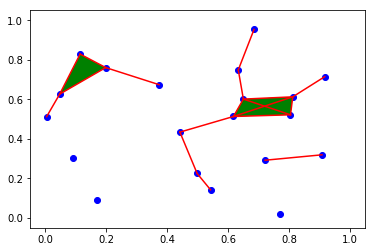

In [240]:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

ax = plt.subplot()
for t in dim2simpleciesList[2]:
    tri = plt.Polygon([ X[v] for v in t], fc='g');
    ax.add_patch(tri)

for e in dim2simpleciesList[1]:
    pt = np.array([X[v] for v in e]).T
    plt.plot(pt[0], pt[1], c='r')

plt.scatter(X[:,0], X[:,1], c='b');

## - Persistent Homology

In [251]:
from dionysus import homology_persistence

In [252]:
hp = homology_persistence(f)
info(hp)

<class 'dionysus._dionysus.ReducedMatrix'>
[('pair', 'method'), ('unpaired', 'non-method')]
Reduced matrix with 43 columns


In [253]:
# Result
for i, c in enumerate(hp):
    print("No. {0} : {1}".format(i, c))
print('---')
info(c)

No. 0 : 
No. 1 : 
No. 2 : 
No. 3 : 
No. 4 : 
No. 5 : 
No. 6 : 
No. 7 : 
No. 8 : 
No. 9 : 
No. 10 : 
No. 11 : 
No. 12 : 
No. 13 : 
No. 14 : 
No. 15 : 
No. 16 : 
No. 17 : 
No. 18 : 
No. 19 : 
No. 20 : 1*7 + 1*15
No. 21 : 1*2 + 1*10
No. 22 : 1*13 + 1*14
No. 23 : 1*3 + 1*18
No. 24 : 1*6 + 1*19
No. 25 : 1*7 + 1*9
No. 26 : 1*1 + 1*13
No. 27 : 1*1 + 1*7
No. 28 : 
No. 29 : 1*20 + 1*27 + 1*28
No. 30 : 
No. 31 : 1*22 + 1*28 + 1*30
No. 32 : 1*8 + 1*16
No. 33 : 1*1 + 1*12
No. 34 : 1*3 + 1*11
No. 35 : 1*3 + 1*6
No. 36 : 1*1 + 1*5
No. 37 : 
No. 38 : 1*23 + 1*35 + 1*37
No. 39 : 1*1 + 1*2
No. 40 : 
No. 41 : 1*22 + 1*27 + 1*40
No. 42 : 
---
<class 'dionysus._dionysus.Chain'>
[]



### Persistent diagram

In [260]:
from dionysus import init_diagrams

In [268]:
diag = init_diagrams(hp, f)

for dim, dg in enumerate(diag):
    print("dim = {0} : {1}".format(dim, dg))
    for d in dg:
        print("  ",d)
print('---')
info(dg)
print('---')
info(d)

dim = 0 : Diagram with 20 points
   (0,inf)
   (0,inf)
   (0,0.216758)
   (0,inf)
   (0,inf)
   (0,0.211024)
   (0,0.20217)
   (0,0.16263)
   (0,inf)
   (0,0.146531)
   (0,0.0936293)
   (0,0.195414)
   (0,0.192908)
   (0,0.148711)
   (0,0.0937617)
   (0,0.0911795)
   (0,0.188886)
   (0,inf)
   (0,0.10823)
   (0,0.121911)
dim = 1 : Diagram with 0 points
dim = 2 : Diagram with 1 points
   (0.218737,inf)
---
<class 'dionysus._dionysus.Diagram'>
[('append', 'method')]
Diagram with 1 points
---
<class 'dionysus._dionysus.DiagramPoint'>
[('birth', 'non-method'), ('data', 'non-method'), ('death', 'non-method')]
(0.218737,inf)


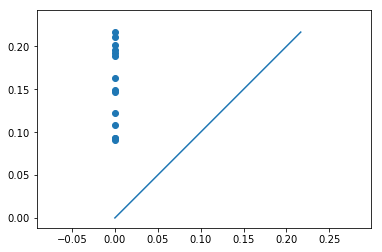

In [264]:
dim = 0
dionysus.plot.plot_diagram(diag[dim], show = True)

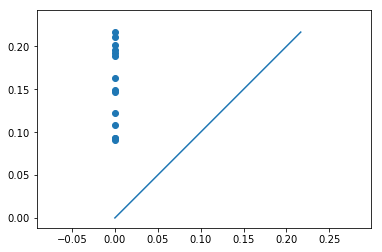

In [264]:
dim = 0
dionysus.plot.plot_bars(diag[dim], show = True)

## - Draw the filtration process

In [7]:
from collections import defaultdict
def get_dim2simpleciesList(filt, radius, dim_feature_space):
    dim2simpleciesList_dic = defaultdict(lambda :[])# 
    for s in f:
        if s.data <= radius:
            dim2simpleciesList_dic[s.dimension()].append(s)
    size = max(dim_feature_space, max(dim2simpleciesList_dic.keys()))
    dim2simpleciesList = [[] for i in range(size + 1)]
    for dim, simpleciesLict in dim2simpleciesList_dic.items():
        dim2simpleciesList[dim] = simpleciesLict
    return dim2simpleciesList

In [26]:
def plot_abstract_complex(X, dim2simpleciesList, ax=None):
    #ax.set_xlim([-0.05, 1.05])
    #ax.set_ylim([-0.05, 1.05])

    if ax is None:
        ax = plt.subplot()
    for t in dim2simpleciesList[2]:
        tri = plt.Polygon([ X[v] for v in t], fc='g');
        ax.add_patch(tri)

    for e in dim2simpleciesList[1]:
        pt = np.array([X[v] for v in e]).T
        ax.plot(pt[0], pt[1], c='r')

    ax.scatter(X[:,0], X[:,1], c='b')

In [9]:
def get_transition_raidus_in_filtration(filt):
    transition_radius = list(set([s.data for s in f]))
    transition_radius.sort()
    return transition_radius

In [10]:
def get_dim2BDarray(filt):
    hp = homology_persistence(filt)
    diag = init_diagrams(hp, filt)
    return [np.array([[d.birth, d.death] for d in dg]) for dg in diag], hp, diag

In [11]:
def BDarray2homRank(BDarray, radius):
    if len(BDarray) == 0:
        return 0
    else:
        return np.sum(np.sum(BDarray <= radius, axis=1) == 1)

def get_homology_rank(dim2BDarray, radius):
    return [(dim, BDarray2homRank(BDarray, radius)) for dim, BDarray in enumerate(dim2BDarray)]

### generate data

In [215]:
num_data_points = 20
dim_feature_space = 2

np.random.seed(10)
X = np.random.rand(num_data_points, dim_feature_space)

### Get the VR complex

In [437]:
dim_of_allowed_complex = 10
max_radius = 0.4

f = fill_rips(X, dim_of_allowed_complex, max_radius)
print(f)

dim2BDarray, hp, diag = get_dim2BDarray(f)

Filtration with 249 simplices


### Compute the Betti numbers

In [438]:
#radius_list = np.linspace(0.0, max_radius, 200)
tr = get_transition_raidus_in_filtration(f)
radius_list = (np.array([0.0] + tr) + np.array(tr + [max_radius])) / 2.

homology_rank_seq = np.array([np.array(get_homology_rank(dim2BDarray, r))[:,1] for r in radius_list])

### Plot

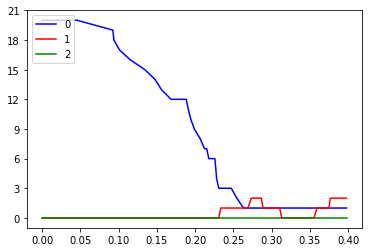

In [442]:
print(len(radius_list))
ax = plt.subplot()
ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
ax.plot(radius_list, homology_rank_seq[:,0], c='b', label='0')
ax.plot(radius_list, homology_rank_seq[:,1], c='r', label='1')
ax.plot(radius_list, homology_rank_seq[:,2], c='g', label='2')
ax.legend(loc='upper left');

### Create the animation
* Warning : It takes a lot of time if you have many simplicies at last
* You can reduce the radius list to reduce the plot output
    + Ex. : reduce by 1/10
        - radius_list = radius_list[::10]

In [1]:
import os
from matplotlib.ticker import MaxNLocator

In [ ]:
save_dir = ...
os.makedirs(save_dir, exist_ok=True)

In [ ]:
%%time
fig = plt.figure(figsize=(14,5))
for i, r in enumerate(radius_list):
    if i % 5 != 0:
        continue
    print("{0}/{1}".format(i, len(radius_list)), '\r', end='')
    fig.clf()
    ax1 = fig.add_subplot(1,2,1)

    ax1.get_yaxis().set_major_locator(MaxNLocator(integer=True))
    ax1.set_ylim([0.,30.])
    ax1.plot(radius_list, homology_rank_seq[:,0], c='b', label='0')
    ax1.plot(radius_list, homology_rank_seq[:,1], c='r', label='1')
    ax1.plot(radius_list, homology_rank_seq[:,2], c='g', label='2')
    ax1.legend(loc='upper left')
    ax1.axvline(x=r, c='y')

    ax2 = fig.add_subplot(1,2,2)
    plot_abstract_complex(X, get_dim2simpleciesList(f, r, dim_feature_space), ax2)

    fig.savefig(os.path.join(save_dir, '{0:04d}.png'.format(i)), dpi=100)

In [30]:
import subprocess, os

In [31]:
%%time
output_dir = ...
gif_name = "anim.gif"
time_interval = 100

target_frames = os.path.join(save_dir, "*.png")
output_gifname = os.path.join(output_dir, gif_name)
convert_command = "convert -layers optimize -loop 0 -delay {2} {0} {1}".format(target_frames, output_gifname, time_interval)
result = subprocess.run(convert_command, shell=True)

CPU times: user 4 ms, sys: 44 ms, total: 48 ms
Wall time: 1.98 s


##### future improvements
* Relative persistent homology
* some materials related to more theoretical definitions of PH or PD...

# 2. Applied examples

In [1]:
#import dionysus
from dionysus import Simplex, Filtration
from dionysus import closure, fill_rips, homology_persistence, init_diagrams
from dionysus.plot import plot_diagram as dplot

import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
def sample_points_from_image(grayscale_image, num_samples=None, ratio=None, threshold=128):
    assert grayscale_image.ndim == 2
    points = np.array(np.where(grayscale_image >= threshold)).T
    np.random.shuffle(points)
    if num_samples is not None:
        return points[:num_samples]
    elif ratio is not None:
        return points[:int(len(points) * ratio)]

def get_1PD(x, num_samples=50, ratio=None, dim_of_allowed_complex=3, max_radius=15.0, threshold=128, dim_list=[1,2]):
    s = sample_points_from_image(x, num_samples=num_samples, ratio=ratio, threshold=threshold)
    f = fill_rips(s.astype(np.float32), dim_of_allowed_complex, max_radius)
    hp = homology_persistence(f)
    diag = init_diagrams(hp, f)
    return { dim : np.array([[d.birth, d.death] for d in diag[dim]]) for dim in dim_list }

def drop_inf(bd_array):
    return bd_array[~(bd_array == np.inf).any(axis=1)]

def plot_PDpoints_for_mnist(points, labels):
    upper = 1.1 * np.max(points[:,1])
    plt.xlim([0.0, upper])
    plt.ylim([0.0, upper])
    plt.scatter(points[:,0], points[:,1], c=labels, cmap=cm.tab10);
    plt.colorbar()
    plt.plot(np.arange(upper), np.arange(upper), c='black');

### 2-1. Artificial example
* Warning : It takes much computational cost. Be care of the memory size !

In [2]:
def generate_rings(num_data_points, seed=0, a=0.1, s=1.0, c=[0., 0.]):
    np.random.seed(seed)
    theta = 4 * np.pi * np.random.rand(num_data_points)
    r = s * np.exp( 2 * a * np.random.rand(num_data_points) - a )
    return (r * np.array([np.cos(theta), np.sin(theta)])).T + np.array(c)

### generate data

In [3]:
X = np.concatenate([generate_rings(130, seed=5),
                    generate_rings(25, seed=2, s=0.2, a=0.05, c=[1.2,0.]),
                    generate_rings(45, seed=3, s=0.35, a=0.3, c=[0.95,0.65])])

num_data_points, dim_feature_space = X.shape
print(num_data_points, dim_feature_space)

200 2


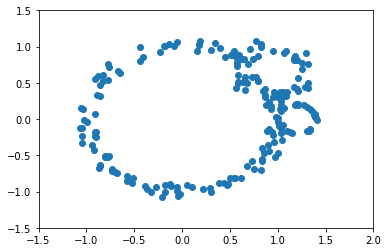

In [4]:
plt.xlim([-1.5, 2.0])
plt.ylim([-1.5, 1.5])
plt.scatter(X[:,0], X[:,1])

### Get the VR complex

In [5]:
%%time
dim_of_allowed_complex = 4
max_radius = 0.6

f = fill_rips(X, dim_of_allowed_complex, max_radius)
print(f)

Filtration with 5281300 simplices
CPU times: user 16.5 s, sys: 272 ms, total: 16.8 s
Wall time: 16.7 s


In [12]:
%%time
dim2BDarray, hp, diag = get_dim2BDarray(f)

CPU times: user 46.7 s, sys: 392 ms, total: 47.1 s
Wall time: 47 s


### Compute and plot the Betti number transitions

In [13]:
%%time
radius_list = np.linspace(0.0, max_radius, 60)

homology_rank_seq = np.array([np.array(get_homology_rank(dim2BDarray, r))[:,1] for r in radius_list])

CPU times: user 4.94 s, sys: 0 ns, total: 4.94 s
Wall time: 4.94 s


60


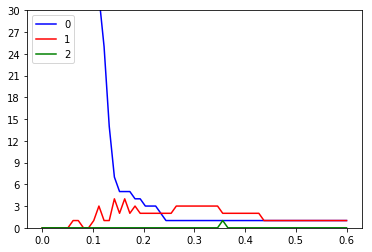

In [24]:
print(len(radius_list))
ax = plt.subplot()
ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.set_ylim([0,30])
ax.plot(radius_list, homology_rank_seq[:,0], c='b', label='0')
ax.plot(radius_list, homology_rank_seq[:,1], c='r', label='1')
ax.plot(radius_list, homology_rank_seq[:,2], c='g', label='2')
#ax.plot(radius_list, homology_rank_seq[:,3], c='y', label='3')
ax.legend(loc='upper left');

### 2-2. MNIST example
* Not good example, however. I'll improve this part in the future and please inform me if you have any idea !

Note:
* 0, 6, 9 has single 1-cycle
    - the cycle in 0 may be greater than that of 6 or 9
* 8 has the two 1-cycles

#### Load mnist

In [ ]:
# describe by yourself a MNIST loading line
x_mnist = ...
y_mnist = ...
assert x_mnist.shape[1:] == (28, 28) and len(x_mnist) == len(y_mnist)

#### check : sampling from digit pixels

digit :  5
# of sampled =  58


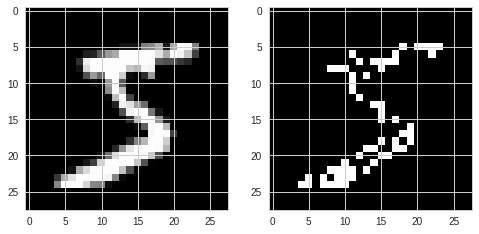

In [16]:
# check mnist images and their pixel sampling examples
i = 0
print("digit : ", y_mnist[i])

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(x_mnist[i], cmap=cm.gray);

s = sample_points_from_image(x_mnist[i], ratio=0.5, threshold=100)
print("# of sampled = ", len(s))
img = np.zeros(x_mnist[i].shape, np.uint8)
img[s[:,0], s[:,1]] = 255
plt.subplot(122)
plt.imshow(img, cmap=cm.gray);

#### Compute the persistent diagram ( birth-death time of cycles )

In [5]:
%%time
num_samples = None
ratio = 0.5
threshold = 100

np.random.seed(10)
target = np.arange(100)
bd_list = []
for i, n in enumerate(target):
    print("{0}/{1}".format(i, len(target)), '\r', end='')
    bd_list.append(get_1PD(x_mnist[n], num_samples=num_samples, ratio=ratio, threshold=threshold))
print('completed')

completed
CPU times: user 6min, sys: 1.13 s, total: 6min 2s
Wall time: 6min 1s


In [7]:
from collections import defaultdict

points = []
labels = []
cycle_lifetimes = defaultdict(lambda :[])
for label, bd in zip(y_mnist[target], bd_list):
    if len(bd[1]) != 0:
        cycle_lifetimes[label].append(bd[1][:,1] - bd[1][:,0])
        for pt in drop_inf(bd[1]):
            points.append(pt)
            labels.append(label)
    else:
        cycle_lifetimes[label].append([])
            
points = np.array(points)
labels = np.array(labels)
cycle_lifetimes = { label : np.array(lt) for label, lt in cycle_lifetimes.items() }

#### Remove the noise cycles

In [8]:
delta = 2.
robust_betti_numbers = defaultdict(lambda :[])
for label, lt_for_each_digit in cycle_lifetimes.items():
    for lt_list in lt_for_each_digit:
        if len(lt_list) == 0:
            robust_betti_numbers[label].append(0)
        else:
            robust_betti_numbers[label].append(np.sum(lt_list > delta))

robust_betti_numbers = { label : np.array(rbn) for label, rbn in robust_betti_numbers.items()}

#### Show the persistent diagrams at the same time
* Notice that one sample can have several points in the PD below. Here we do not pay attentions to it.

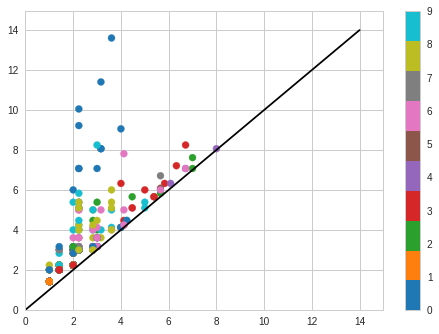

In [9]:
plot_PDpoints_for_mnist(points, labels)

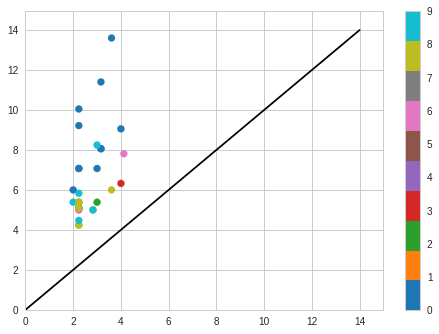

In [10]:
delta = 2.0
robust = points[:,1] - points[:,0] > delta

plot_PDpoints_for_mnist(points[robust], labels[robust])

#### Show the betti number distributions

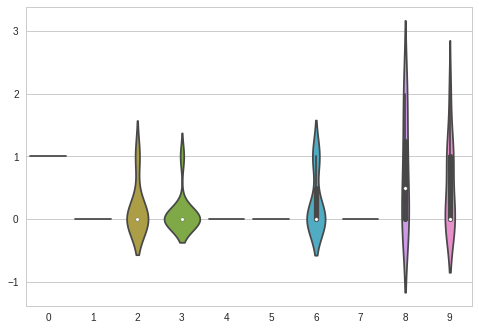

In [11]:
sns.violinplot(data=[robust_betti_numbers[l] for l in range(10)]);